Chapter 5 Exercises

In [1]:
import numpy as np

import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)
from sklearn.model_selection import train_test_split


from functools import partial
from sklearn.model_selection import (cross_validate,
KFold,
ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

print("Done")

Done


5

A

In [2]:
Default = load_data('Default')
Default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [3]:
allvars = Default.columns.drop(['default','student'])
design = MS(allvars)
X = design.fit_transform(Default)
Y = Default.default == 'Yes'
glm = sm.GLM(Y,X,family= sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-11.540500,0.435000,-26.544,0.0
balance,0.005600,0.000000,24.835,0.0
income,0.000021,0.000005,4.174,0.0


B

In [4]:
Default_train, Default_valid = train_test_split(Default, test_size=5000, random_state= 0)

In [5]:
new = MS(['balance', 'income'])

X_train = new.fit_transform(Default_train)
Y_train = Default_train['default'] == 'Yes'

model = sm.GLM(Y_train, X_train, family= sm.families.Binomial())

results = model.fit()

In [6]:
X_valid = new.transform(Default_valid)
Y_valid = Default_valid['default'] == 'Yes'

valid_pred = results.predict(X_valid)

np.mean((Y_valid - valid_pred)**2)

0.023279579914006268

Approximately 2.3 % of the validation set is misclassified

C

In [7]:
Default_train, Default_valid = train_test_split(Default, test_size=5000, random_state= 1)

new = MS(['balance', 'income'])

X_train = new.fit_transform(Default_train)
Y_train = Default_train['default'] == 'Yes'

model = sm.GLM(Y_train, X_train, family= sm.families.Binomial())

results = model.fit()

X_valid = new.transform(Default_valid)
Y_valid = Default_valid['default'] == 'Yes'

valid_pred = results.predict(X_valid)

np.mean((Y_valid - valid_pred)**2)


0.021206070447197297

Approximately 2.1% of the validation set is misclassified

In [8]:
Default_train, Default_valid = train_test_split(Default, test_size=5000, random_state= 2)

new = MS(['balance', 'income'])

X_train = new.fit_transform(Default_train)
Y_train = Default_train['default'] == 'Yes'

model = sm.GLM(Y_train, X_train, family= sm.families.Binomial())

results = model.fit()

X_valid = new.transform(Default_valid)
Y_valid = Default_valid['default'] == 'Yes'

valid_pred = results.predict(X_valid)

np.mean((Y_valid - valid_pred)**2)

0.020058799889097152

Approximately 2% of the validation set is misclassified

In [9]:
Default_train, Default_valid = train_test_split(Default, test_size=5000, random_state= 3)

new = MS(['balance', 'income'])

X_train = new.fit_transform(Default_train)
Y_train = Default_train['default'] == 'Yes'

model = sm.GLM(Y_train, X_train, family= sm.families.Binomial())

results = model.fit()

X_valid = new.transform(Default_valid)
Y_valid = Default_valid['default'] == 'Yes'

valid_pred = results.predict(X_valid)

np.mean((Y_valid - valid_pred)**2)

0.020832430111728584

Approximately 2.1% of the validation set is misclassified

D

In [10]:
'''Default_train, Default_valid = train_test_split(Default, test_size=5000, random_state= 0)

new = MS(['balance', 'income','student'])

X_train = new.fit_transform(Default_train)
Y_train = Default_train['default'] == 'Yes'

model = sm.GLM(Y_train, X_train, family= sm.families.Binomial())

results = model.fit()

X_valid = new.transform(Default_valid)
Y_valid = Default_valid['default'] == 'Yes'

valid_pred = results.predict(X_valid)

np.mean((Y_valid - valid_pred)**2) '''


"Default_train, Default_valid = train_test_split(Default, test_size=5000, random_state= 0)\n\nnew = MS(['balance', 'income','student'])\n\nX_train = new.fit_transform(Default_train)\nY_train = Default_train['default'] == 'Yes'\n\nmodel = sm.GLM(Y_train, X_train, family= sm.families.Binomial())\n\nresults = model.fit()\n\nX_valid = new.transform(Default_valid)\nY_valid = Default_valid['default'] == 'Yes'\n\nvalid_pred = results.predict(X_valid)\n\nnp.mean((Y_valid - valid_pred)**2) "

6

A

In [11]:
Default_train, Default_valid = train_test_split(Default, test_size=5000, random_state= 0)

new = MS(['balance', 'income'])

X_train = new.fit_transform(Default_train)
Y_train = Default_train['default'] == 'Yes'

model = sm.GLM(Y_train, X_train, family= sm.families.Binomial())

results = model.fit()

summarize(results)

,coef,std err,z,P>|z|
intercept,-11.389600,0.635000,-17.935,0.000
balance,0.005600,0.000000,16.792,0.000
income,0.000016,0.000007,2.151,0.031


B

In [12]:


from sklearn.utils import resample

In [13]:
def boot_fn(df):
    return resample(df)

In [14]:
new_default = boot_fn(Default)

C

In [15]:
Default_train, Default_valid = train_test_split(new_default, test_size=5000, random_state= 0)

new = MS(['balance', 'income'])

X_train = new.fit_transform(Default_train)
Y_train = Default_train['default'] == 'Yes'

model = sm.GLM(Y_train, X_train, family= sm.families.Binomial())

results = model.fit()

summarize(results)

,coef,std err,z,P>|z|
intercept,-11.801300,0.648000,-18.204,0.000
balance,0.005800,0.000000,17.350,0.000
income,0.000019,0.000007,2.608,0.009


D

The Standard Errors are essentialy identical for all practical purposes

8

In [16]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

A

n = 100 and p = 2

B

In [17]:
from matplotlib.pyplot import subplots

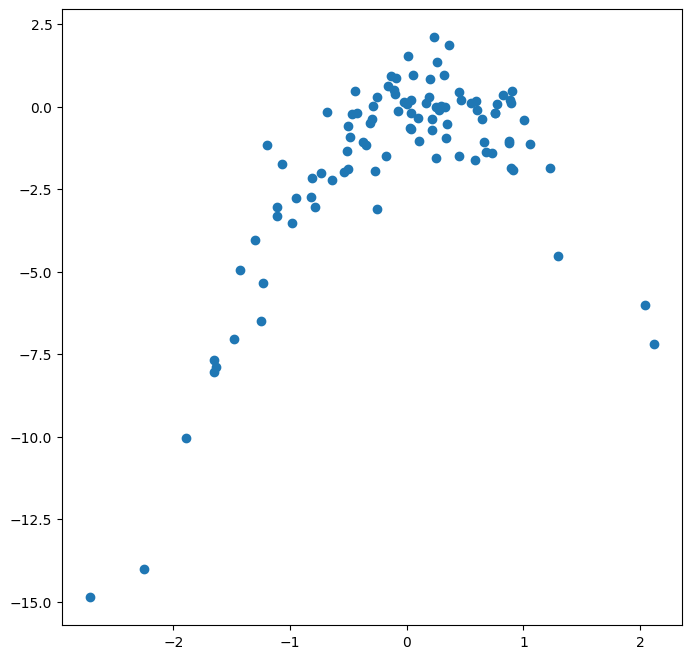

In [18]:
ax = subplots(figsize = (8,8))[1]

ax.scatter(x,y);

The scatterplot depicts a non-linear relationship with some variance, as expected from the generated data

9

In [19]:
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


A

In [21]:
mu_hat = Boston['medv'].mean()
mu_hat

22.532806324110677

B

In [22]:
SE = np.std(Boston['medv']) / np.sqrt(len(Boston['medv']))
SE

0.4084569346972866

C

In [23]:
new_Boston = boot_fn(Boston)

SE = np.std(new_Boston['medv']) / np.sqrt(len(new_Boston['medv']))
SE

0.4276224100485673

The standard error is now a slightly different value

D

In [24]:
mu_hat - 2*SE , mu_hat + 2*SE

(21.677561504013543, 23.38805114420781)

In [25]:
SE = np.std(Boston['medv']) / np.sqrt(len(Boston['medv']))
mu_hat - 2*SE , mu_hat + 2*SE

(21.715892454716105, 23.34972019350525)

The 95% Confidence Intervals are essentially the same

E

In [27]:
med_hat = Boston['medv'].median()
med_hat

21.2

G

In [31]:
tenth = np.percentile(Boston['medv'],10)
tenth

12.75